# The Hénon Attractor

In [1]:
# General packages
import numpy as np
from matplotlib.pyplot import figure, show, savefig

# Own code
import boxes as bo
import full_attractor as fa
import general as ge
import lyapunov as ly
import text_processing as tp
import trapping_region as tr

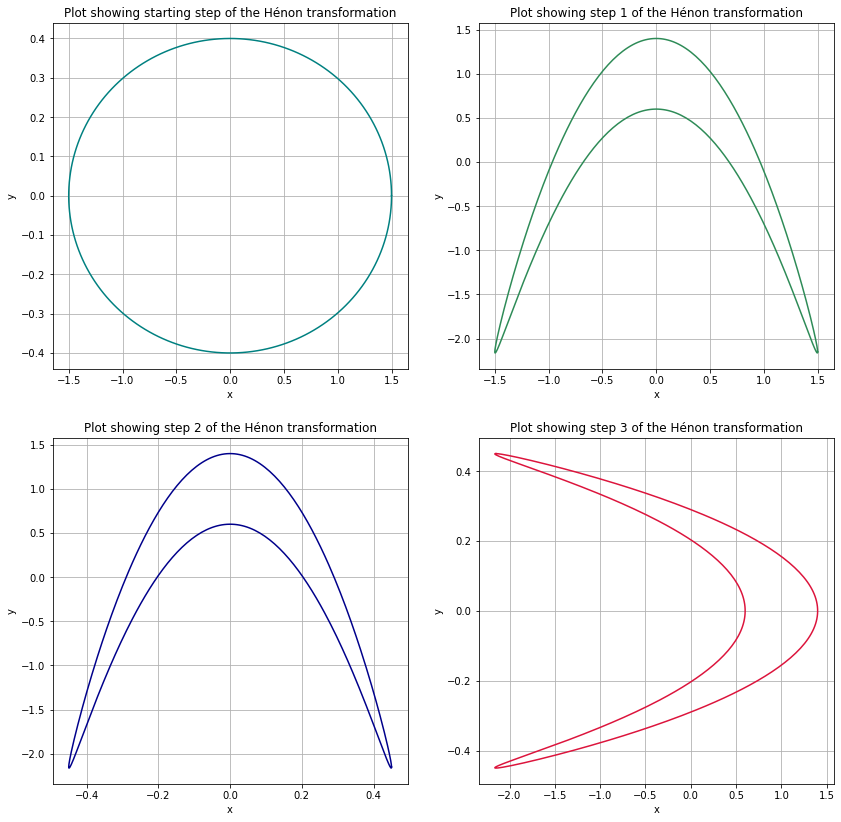

In [2]:
# Creating a plot showing the different steps

# Parameter values that will be used
Av = 1.4
Bv = 0.3

# Values for the first step
maj_ax = 1.5
min_ax = 0.4

# Starting with an ellipse
vals = np.linspace(0, 360, 400)

# Creating the x and y values for the ellipse
x_ell = maj_ax * np.cos(np.radians(vals))
y_ell = min_ax * np.sin(np.radians(vals))

# Creating the three steps
step1 = fa.step_1(maj_ax, min_ax, Av)
step2 = fa.step_2(step1[0], step1[1], Bv)
step3 = fa.step_3(step2[0], step2[1])

# Combining all steps
all_steps = [(x_ell, y_ell), step1, step2, step3]

# Constants for the plot
labels = ["starting step", "step 1", "step 2", "step 3"]
colors = ["teal", "seagreen", "darkblue", "crimson"]

# Plotting
fig = figure(figsize=(14,14))

for f in range(len(all_steps)):
    frame = fig.add_subplot(2, 2, f+1)
    frame.plot(all_steps[f][0], all_steps[f][1], color=colors[f])
    
    #frame.set_xlim(-1.6, 1.6)
    #frame.set_ylim(-2.3, 2)
    
    frame.set_xlabel("x")
    frame.set_ylabel("y")
    frame.set_title(f"Plot showing {labels[f]} of the Hénon transformation")
    
    frame.grid()
    
# Uncomment to save the figure
#fig.savefig("steps_hénon.png")

show()

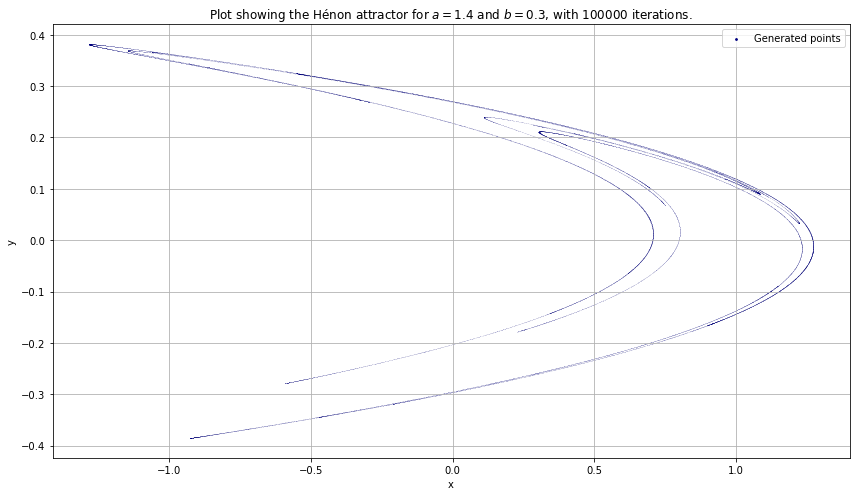

In [3]:
# Plotting the Hénon attractor

# Initial conditions and iterations
x0 = y0 = 0
its = int(1e5)

# Creating the points
henon = fa.Henon(x0, y0, its, Av, Bv)

# Marker size, should be adjusted depending on the number of iterations
ms = 0.0002

# Plotting
fig = figure(figsize=(12,7))
frame = fig.add_subplot(1,1,1)

frame.scatter(henon[0], henon[1], s=ms, label="Generated points", color="navy", marker='.')

frame.set_xlabel("x")
frame.set_ylabel("y")
frame.set_title(f"Plot showing the Hénon attractor for $a = {Av}$ and $b ={Bv}$, with {its} iterations.")

frame.grid()
frame.legend(markerscale=250)

fig.tight_layout()

# Uncomment to save figure
#fig.savefig("henon_attractor.png")

show()

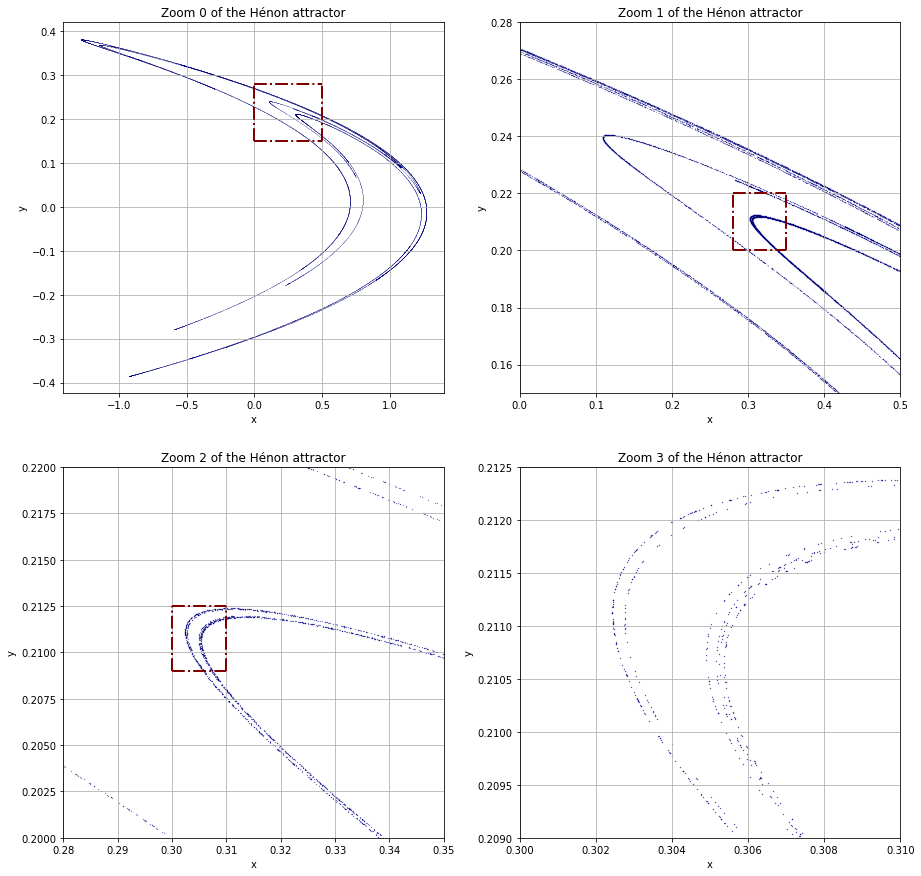

In [4]:
# Adding boxes and some sort of zooming

# Creating the limits of the boxes
box1 = {'x': (0, 0.5), 'y': (0.15, 0.28)}
box2 = {'x': (0.28, 0.35), 'y': (0.2, 0.22)}
box3 = {'x': (0.3, 0.31), 'y': (0.209, 0.2125)}
all_boxs = [box1, box2, box3]

# Plotting
bo.create_box_grid(all_boxs)

# Uncomment to save the figure
#fig.savefig('Hénon_map_pieces.png')

show()

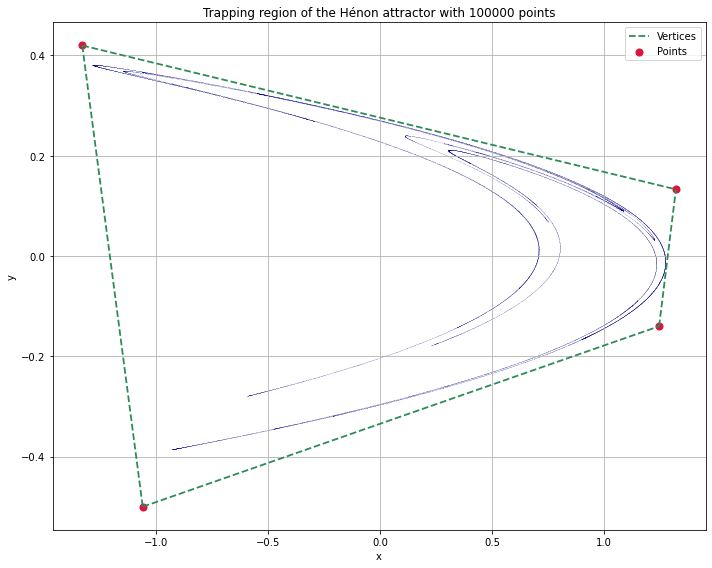

In [5]:
# Trapping region

# Vertices (see Peitgens et al.)
P1 = (-1.33, 0.42)
P2 = (1.32, 0.133)
P3 = (1.245, -0.14)
P4 = (-1.06, -0.5)

Points = [P1, P2, P3, P4]

# Creating the lines
Vert1 = tr.Create_Line(P1, P2)
Vert2 = tr.Create_Line(P2, P3)
Vert3 = tr.Create_Line(P3, P4)
Vert4 = tr.Create_Line(P4, P1)

Vertices = [Vert1, Vert2, Vert3, Vert4]

# Plotting
fig = figure(figsize=(10,8))
frame = fig.add_subplot(1,1,1)

frame.scatter(henon[0], henon[1], s=ms, color="darkblue", marker=".")

for i in range(len(Points)):
    if i == 0:
        frame.scatter(Points[i][0], Points[i][1], label="Points", color="crimson", marker="o", s=50)
        frame.plot(Vertices[i][0], Vertices[i][1], label="Vertices", color="seagreen", linestyle="--", lw=1.8)
    else:
        frame.scatter(Points[i][0], Points[i][1], color="crimson", marker="o", s=50)
        frame.plot(Vertices[i][0], Vertices[i][1], color="seagreen", linestyle="--", lw=1.8)

frame.set_title(f'Trapping region of the Hénon attractor with {its} points')
frame.set_xlabel('x')
frame.set_ylabel('y')

frame.grid()
frame.legend()

fig.tight_layout()

# Uncomment to save the figure
#fig.savefig('Hénon_trapping_region.pdf')

show()

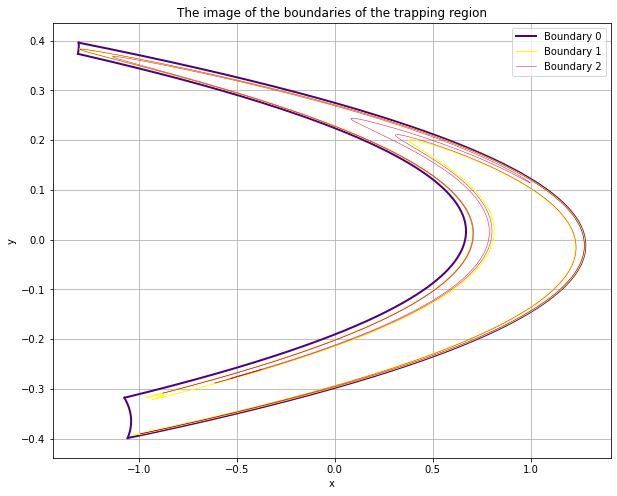

In [6]:
# Finding the first 3 images of the quadrilateral of the trapping region above

# Constants
start = 0
end = 2

# Plotting
fig = figure(figsize=(10,8))
frame = fig.add_subplot(1,1,1)

colors = ['indigo', 'yellow', 'crimson']
widths = [2, 1, 0.5]

# Uncomment to add the attractor itself
#frame.scatter(henon[0], henon[1], s=ms, color="crimson", marker=".")
tr.plot_n_img(Vertices, n_start=start, n_end=end, ax=frame, color=colors, lw=widths)
    
frame.set_title("The image of the boundaries of the trapping region")
frame.set_xlabel("x")
frame.set_ylabel("y")

frame.grid()
frame.legend()

# Uncomment to save the figure
#fig.savefig('Trapping_region_image.pdf')

show()

In [7]:
# Lyapunov exponents

# Number of iterations for the initial point
n_init = int(1e4)
cutoff = int(1e2)

# Calculating the points of the Hénon attractor
xval_henon, yval_henon = fa.Henon(x0, y0, n_init, Av, Bv)
xred, yred = xval_henon[cutoff:], yval_henon[cutoff:]

# Standard basis vectors
basis_vects = ly.basis(2)

# Calculating
lya = ly.Lyapunov(n_init-cutoff, np.array(basis_vects), xred, Av, Bv)
print(lya)

[0.4187450628306402, -1.6227178671565776]
